<a href="https://colab.research.google.com/github/YashMajithia/NFL-Big-Data-Bowl-2023/blob/main/NFL_Big_Data_Bowl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
!pip install tablib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 249.6 kB/s eta 0:00:00


In [ ]:
#importing dataset
from google.colab import drive
import tablib
drive.mount('/content/gdrive')
data = tablib.Dataset('/content/gdrive/My Drive/nfl-big-data-bowl-2023/data.csv', delimiter=',')
print(data)

Mounted at /content/gdrive
/|c|o|n|t|e|n|t|/|g|d|r|i|v|e|/|M|y| |D|r|i|v|e|/|n|f|l|-|b|i|g|-|d|a|t|a|-|b|o|w|l|-|2|0|2|3|/|d|a|t|a|.|c|s|v


In [ ]:
games = pd.read_csv('/content/gdrive/My Drive/nfl-big-data-bowl-2023/games.csv')
pffS = pd.read_csv('/content/gdrive/My Drive/nfl-big-data-bowl-2023/pffScoutingData.csv')
players = pd.read_csv('/content/gdrive/My Drive/nfl-big-data-bowl-2023/players.csv')
plays = pd.read_csv('/content/gdrive/My Drive/nfl-big-data-bowl-2023/plays.csv')
week1 = pd.read_csv('/content/gdrive/My Drive/nfl-big-data-bowl-2023/week1.csv')
week2 = pd.read_csv('/content/gdrive/My Drive/nfl-big-data-bowl-2023/week2.csv')
week3 = pd.read_csv('/content/gdrive/My Drive/nfl-big-data-bowl-2023/week3.csv')
week4 = pd.read_csv('/content/gdrive/My Drive/nfl-big-data-bowl-2023/week4.csv')
week5 = pd.read_csv('/content/gdrive/My Drive/nfl-big-data-bowl-2023/week5.csv')
week6 = pd.read_csv('/content/gdrive/My Drive/nfl-big-data-bowl-2023/week6.csv')
week7 = pd.read_csv('/content/gdrive/My Drive/nfl-big-data-bowl-2023/week7.csv')
week8 = pd.read_csv('/content/gdrive/My Drive/nfl-big-data-bowl-2023/week8.csv')

# **BASIC DATA HEADS-UP**
A heads up into the basic information like number of games per date, which team played the most against each other, at what time major games were played, and how many times teams play home and away games.

In [ ]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,2021,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,2021,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,2021,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,2021,1,09/12/2021,13:00:00,CIN,MIN


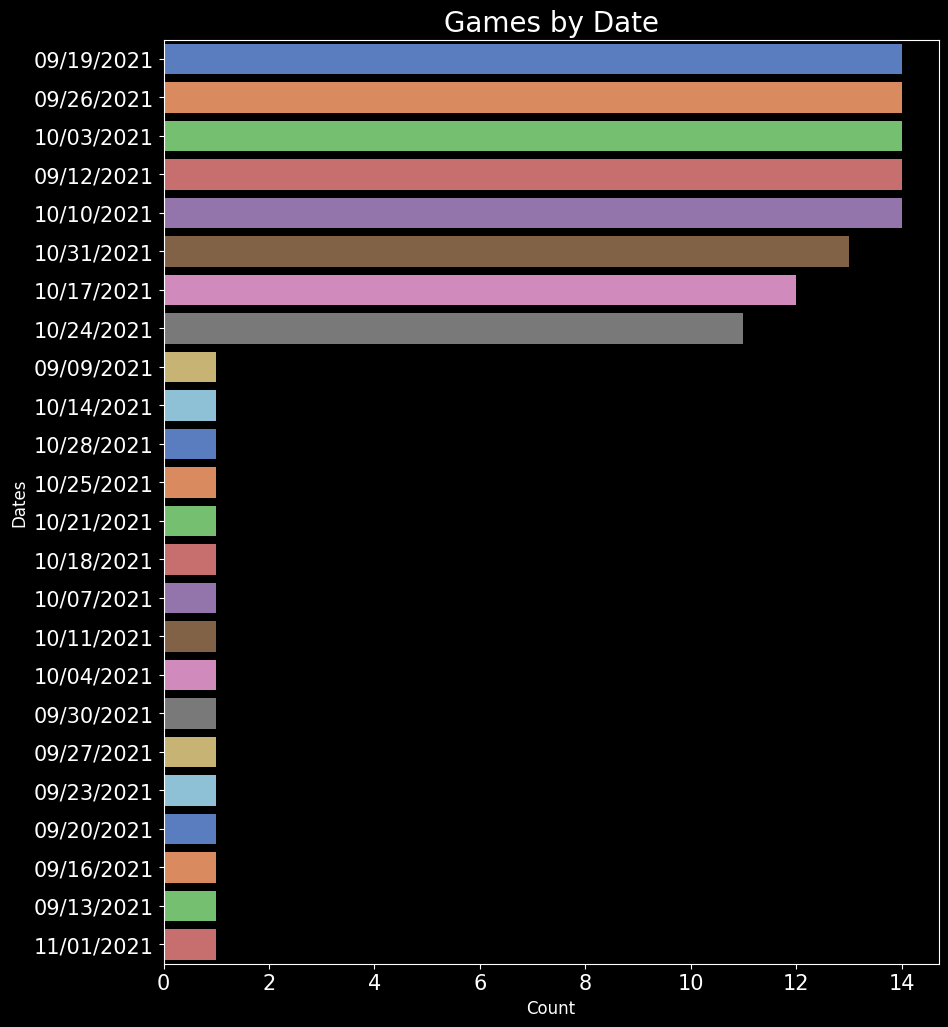

In [ ]:
#number of games by date
'calling out the variable'
games_bd = games['gameDate'].value_counts()
plt.figure(figsize=(10,12))
'plotting the plot and defining the x axis and y axis'
sns.barplot(x = games_bd.values , y=games_bd.index , order = games_bd.index, palette='muted')
'giving title to the plot and setting up font sizes'
plt.title('Games by Date' , fontsize=20)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Dates', fontsize = 12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.style.use('dark_background')

plt.show()

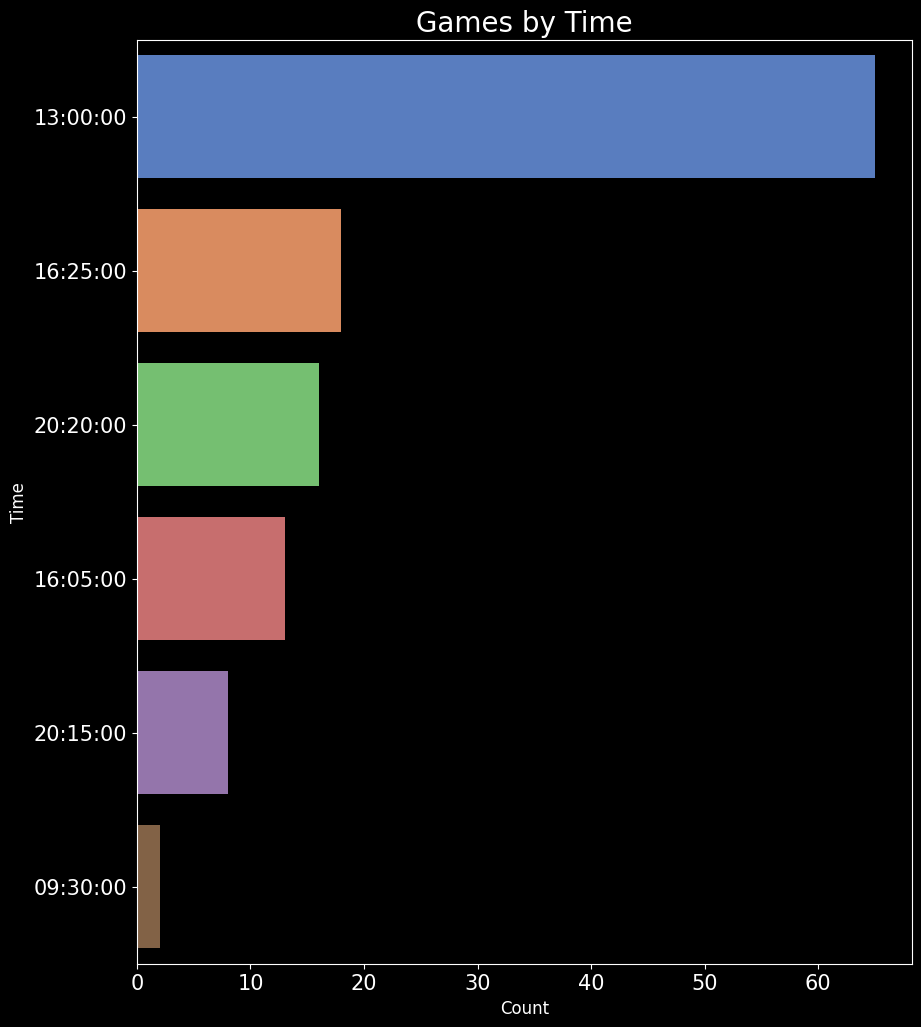

In [ ]:
#number of games by time
'calling out the variable'
games_bt = games['gameTimeEastern'].value_counts()
plt.figure(figsize=(10,12))
'plotting the plot and defining the x axis and y axis'
sns.barplot(x = games_bt.values, y = games_bt.index, order = games_bt.index, palette = 'muted')
'giving title to the plot and setting up font sizes'
plt.title('Games by Time', fontsize = 20)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Time', fontsize = 12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.style.use('dark_background')

plt.show()

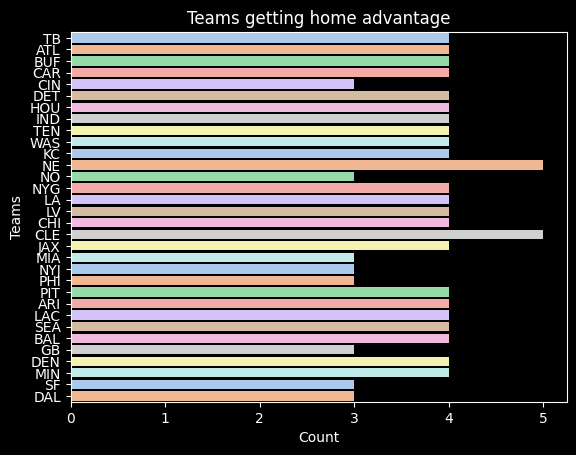

In [ ]:
#name of times teams playing home game
sns.countplot(data=games,y='homeTeamAbbr',palette='pastel')
plt.title('Teams getting home advantage')
plt.xlabel('Count')
plt.ylabel('Teams')
plt.style.use('dark_background')
plt.show()

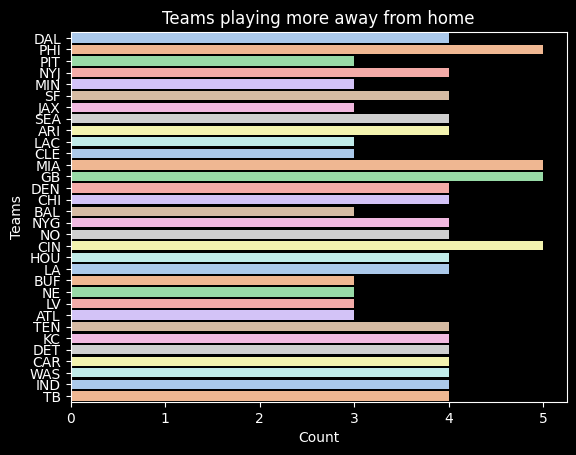

In [ ]:
#number of times teams playing away game
sns.countplot(data=games,y='visitorTeamAbbr',palette='pastel')
plt.title('Teams playing more away from home')
plt.xlabel('Count')
plt.ylabel('Teams')
plt.style.use('dark_background')
plt.show()

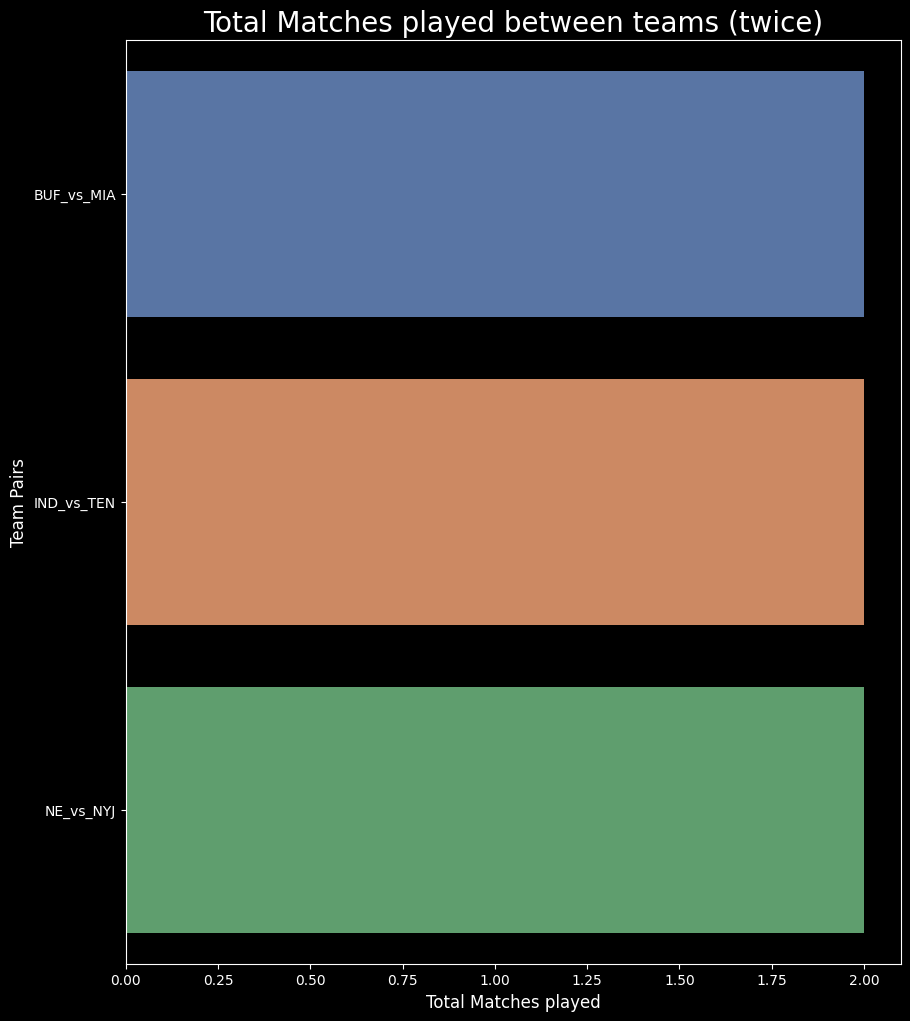

In [ ]:
#number of times each team has played against each other
'joining the home and visitor team column'
games['team_pair'] = games[['homeTeamAbbr', 'visitorTeamAbbr']].apply(lambda x: '_vs_'.join(sorted(x)), axis=1)
plt.figure(figsize=(10,12))

'converting to datetime from date'
games['gameDate'] = pd.to_datetime(games['gameDate'])

'grouping the matches by team pairs and counting the number of matches'
time_played = games.groupby('team_pair')['gameDate'].count().reset_index()
time_played.rename(columns={'gameDate':'matches_played'}, inplace = True)
time_played = time_played[time_played['matches_played'] == 2]

'plotting the plot and defining the x axis and y axis'
sns.barplot(x =  time_played['matches_played'],y = time_played['team_pair'], order =  time_played['team_pair'], palette = 'deep')
'giving title to the plot and setting up font sizes'
plt.title('Total Matches played between teams (twice)', fontsize = 20)
plt.xlabel('Total Matches played', fontsize = 12)
plt.ylabel('Team Pairs', fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# **PLAYER DATA HEADS UP**
A heads up in the basic information about players, like height, weight, old player age count, the play positions and their colleges.

In [ ]:
players.head()

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick


Text(0, 0.5, 'Count')

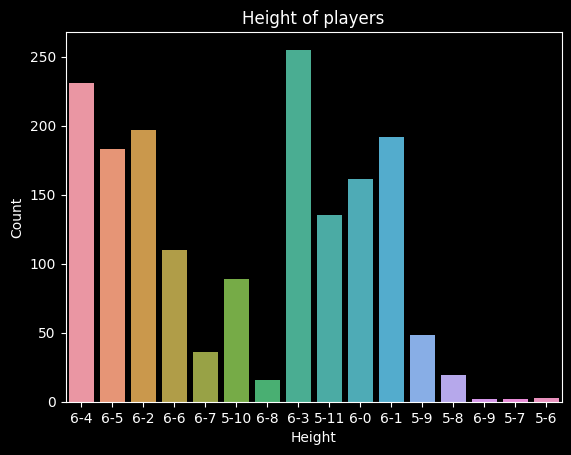

In [ ]:
#height of players
sns.countplot(data=players,x='height')
plt.title('Height of players')
plt.xlabel('Height')
plt.ylabel('Count')

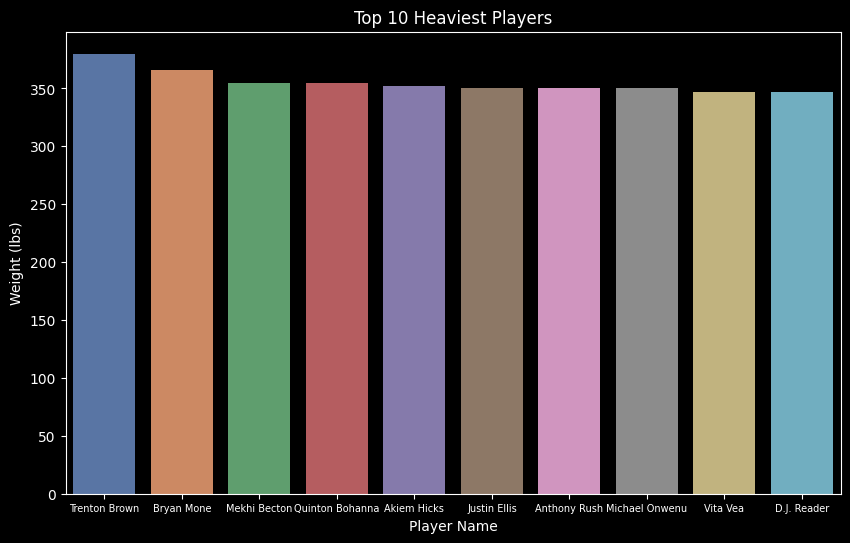

In [ ]:
#weight of players
'calling out the variable'
w = players.sort_values('weight', ascending=False).head(10)
plt.figure(figsize=(10, 6))
'plotting the plot and defining the x axis and y axis'
sns.barplot(data=w, x='displayName', y='weight',palette='deep')
'giving title to the plot'
plt.title('Top 10 Heaviest Players')
plt.xlabel('Player Name')
plt.ylabel('Weight (lbs)')
plt.xticks(fontsize=7)

plt.show()

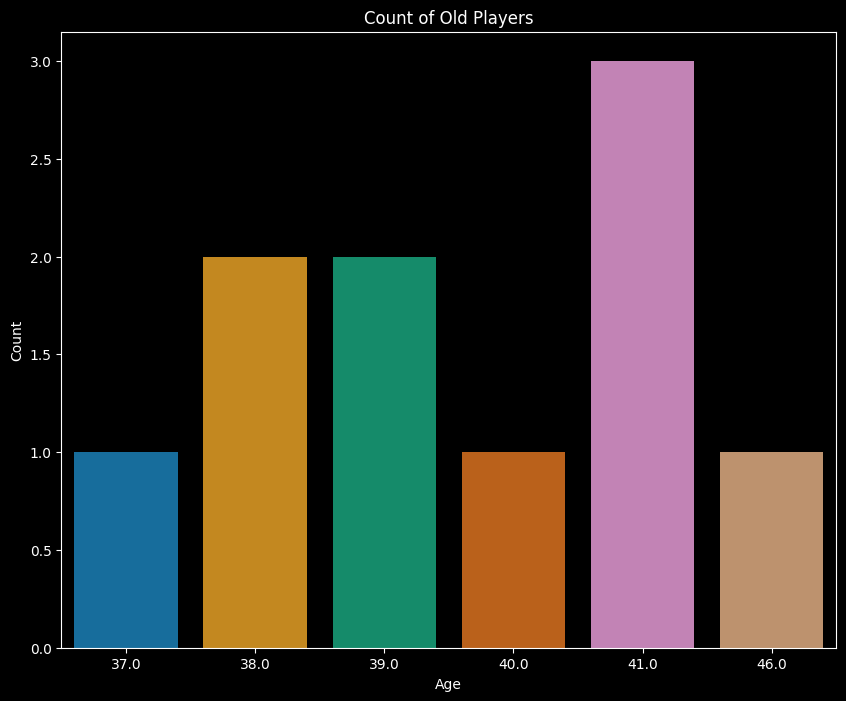

In [ ]:
#age of players
import datetime as dt
today=pd.Timestamp.now() #writing this code on 29/7/2023
players['age']=(today - pd.to_datetime(players['birthDate'])).dt.days // 365
oldest=players.nlargest(10,'age')
plt.figure(figsize=(10,8))
sns.countplot(x='age',data=oldest,palette='colorblind')
plt.title('Count of Old Players')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

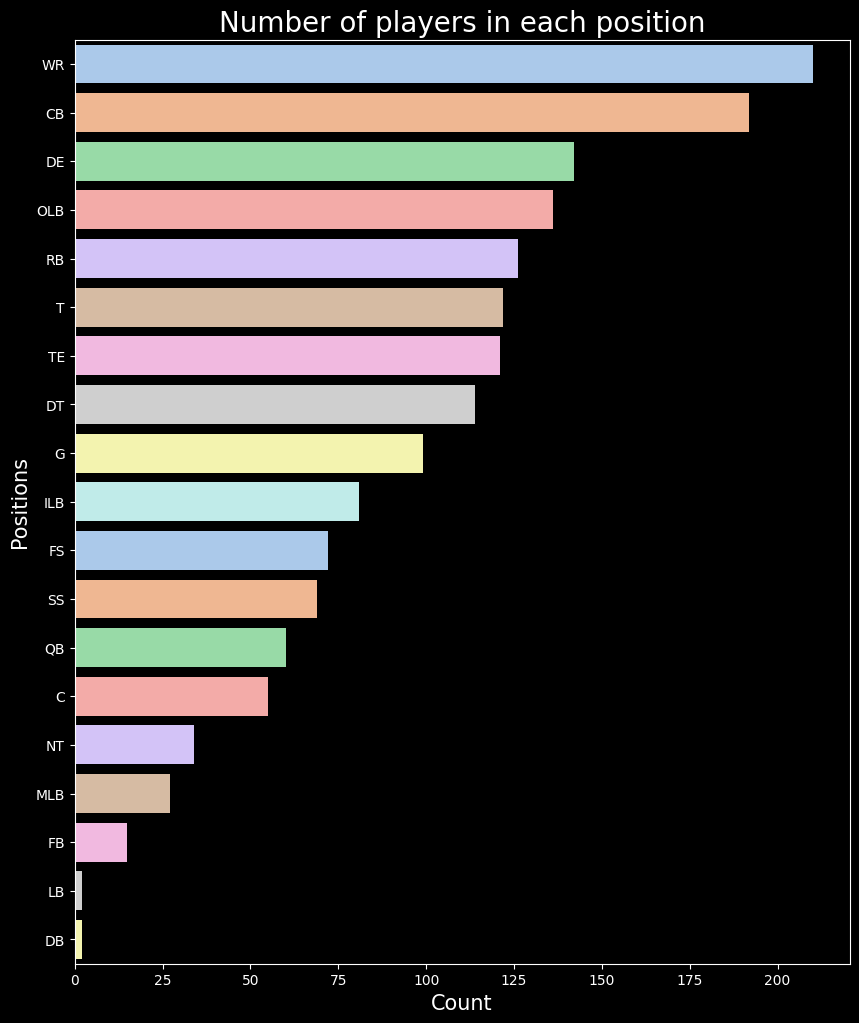

In [ ]:
#number of players by positions
'calling out the variable'
player_pos = players['officialPosition'].value_counts()
plt.figure(figsize=(10,12))

'plotting the plot and defining the x axis and y axis'
sns.barplot(x=player_pos.values, y=player_pos.index, order= player_pos.index, palette='pastel')

'givin title to the plot and settin up font sizes'
plt.title('Number of players in each position', fontsize = 20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Positions', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.style.use('dark_background')

plt.show()

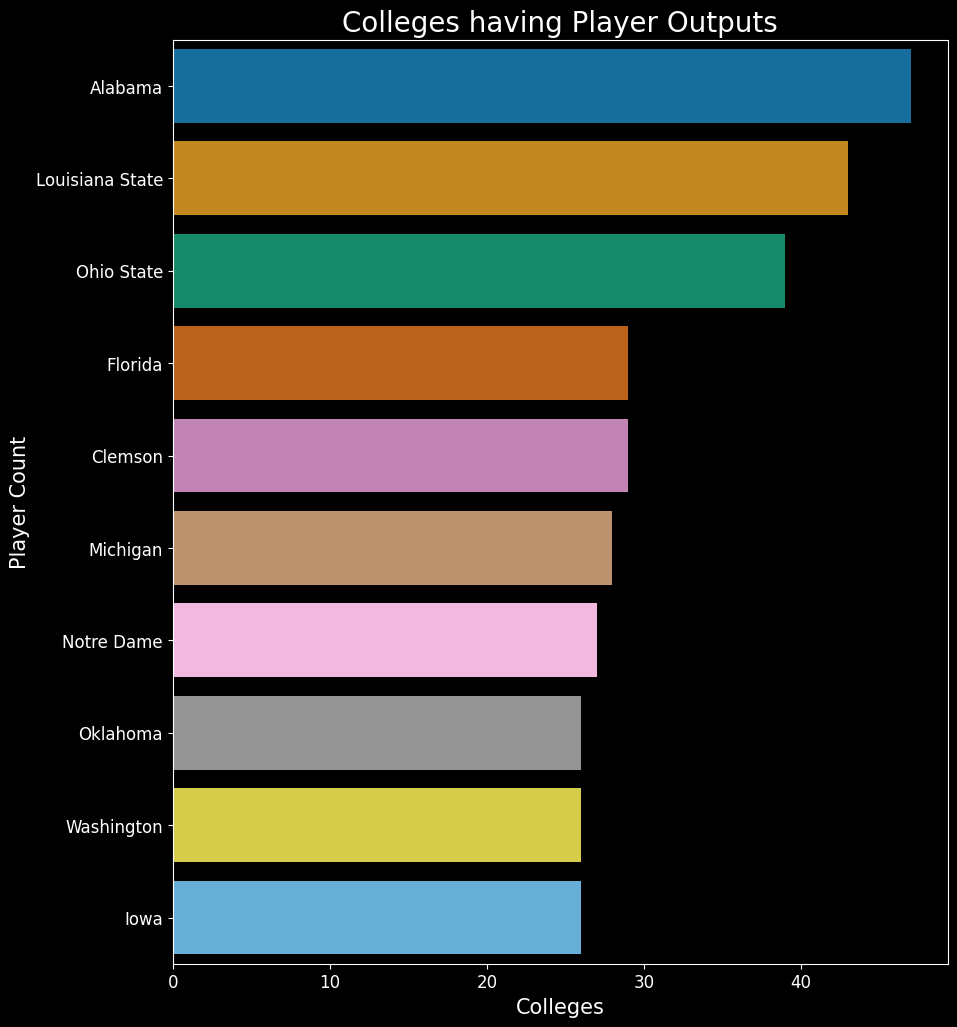

In [ ]:
#colleges outputting players frequency
'calling out the variable'
colleges = players['collegeName'].value_counts().head(10)
plt.figure(figsize=(10,12))

'plotting the plot'
sns.barplot(x=colleges.values,y=colleges.index,palette='colorblind')

'giving title to the plot and setting up font sizes'
plt.title('Colleges having Player Outputs', fontsize=20)
plt.xlabel('Colleges',fontsize=15)
plt.ylabel('Player Count', fontsize=15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize=12)

plt.show()

# **PLAYS ANALYSIS**
Analysing different types of plays that happend during games.


In [ ]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,...,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,...,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


In [ ]:
print(plays.isnull().sum())
plays.drop_duplicates(inplace=True)
plays.fillna(0,inplace=True)

gameId                       0
playId                       0
playDescription              0
quarter                      0
down                         0
yardsToGo                    0
possessionTeam               0
defensiveTeam                0
yardlineSide               125
yardlineNumber               0
gameClock                    0
preSnapHomeScore             0
preSnapVisitorScore          0
passResult                   0
penaltyYards              7801
prePenaltyPlayResult         0
playResult                   0
foulName1                 7821
foulNFLId1                7821
foulName2                 8527
foulNFLId2                8527
foulName3                 8556
foulNFLId3                8556
absoluteYardlineNumber       1
offenseFormation             7
personnelO                   1
defendersInBox               7
personnelD                   1
dropBackType               528
pff_playAction               0
pff_passCoverage             0
pff_passCoverageType         0
dtype: i

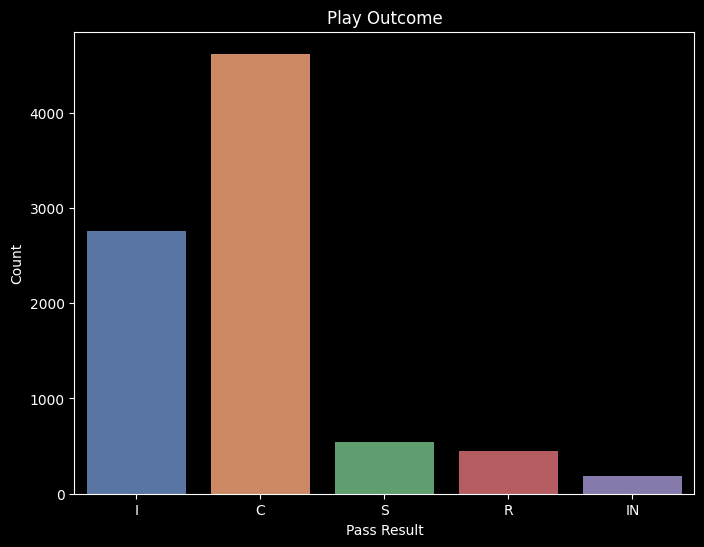

In [ ]:
#play outcome distribution to understand success rate of passes
plt.figure(figsize=(8,6))
sns.countplot(x='passResult', data=plays,palette='deep')
plt.title('Play Outcome')
plt.xlabel('Pass Result')
plt.ylabel('Count')

plt.show()

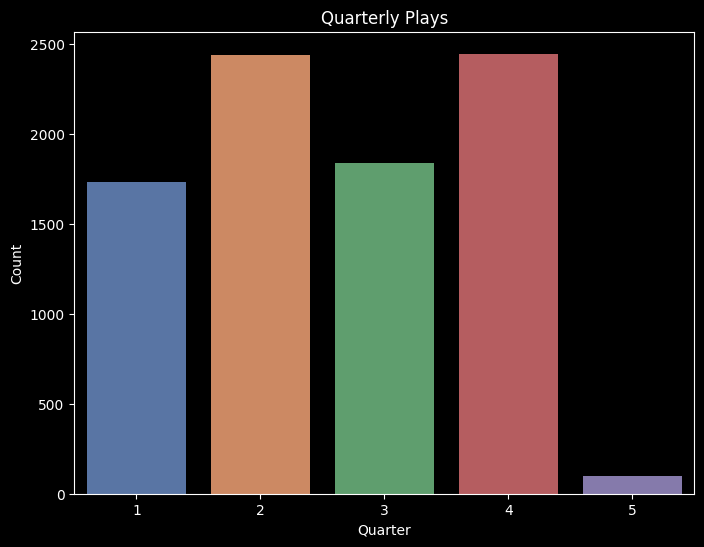

In [ ]:
#quarterly play distribution
plt.figure(figsize=(8,6))
sns.countplot(x='quarter',data=plays,palette='deep')
plt.title('Quarterly Plays')
plt.xlabel('Quarter')
plt.ylabel('Count')

plt.show()

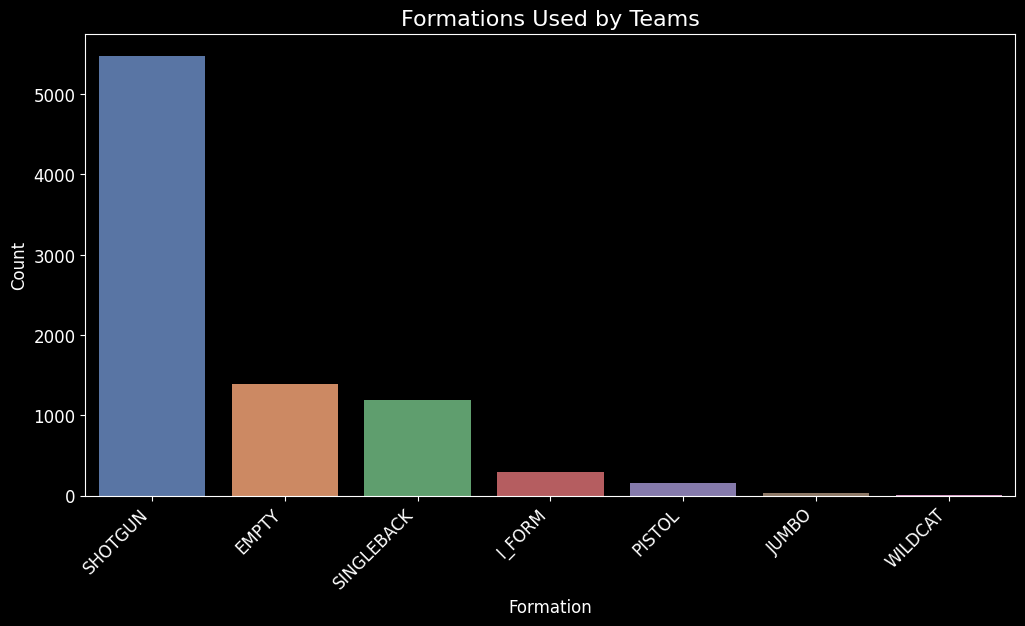

In [ ]:
#average offensive formation
'dropping na values'
plays_filtered=plays.dropna(subset=['offenseFormation'])
'calling out the variable'
formations=plays_filtered['offenseFormation'].value_counts()
plt.figure(figsize=(12,6))
'plotting the plot and defining x axis and y axis'
sns.barplot(x=formations.index,y=formations.values, palette='deep')
'giving title to the plot and axes'
plt.title('Formations Used by Teams', fontsize=16)
plt.xlabel('Formation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.style.use('dark_background')
plt.show()

Text(0, 0.5, 'Team')

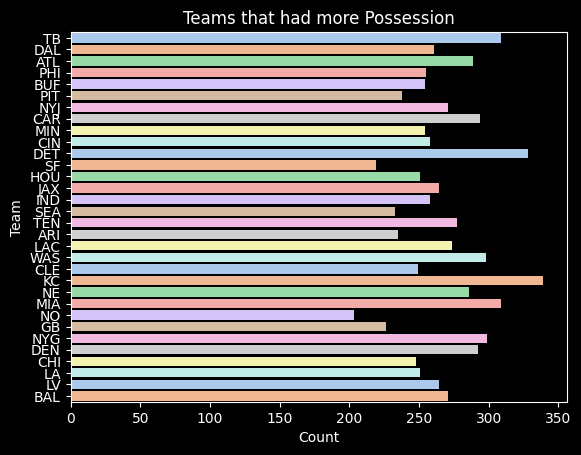

In [ ]:
#teams with more possession-based play
sns.countplot(data=plays, y = 'possessionTeam',palette='pastel')
plt.title('Teams that had more Possession')
plt.xlabel('Count')
plt.ylabel('Team')

Text(0, 0.5, 'Team')

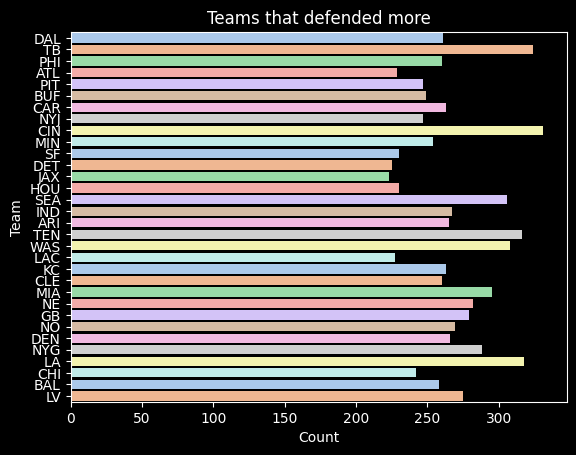

In [ ]:
#teams with more defensive-based play
sns.countplot(data=plays, y='defensiveTeam',palette='pastel')
plt.title('Teams that defended more')
plt.xlabel('Count')
plt.ylabel('Team')

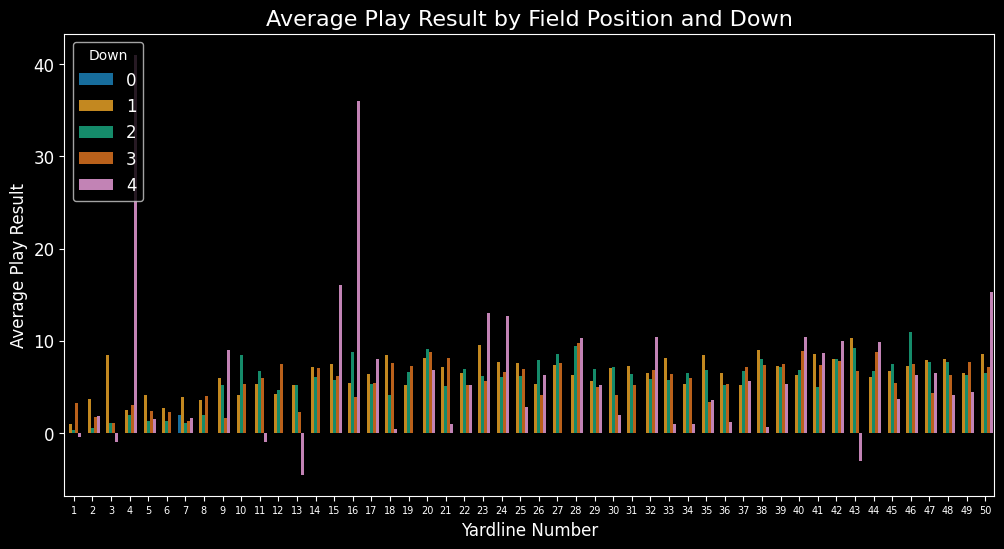

In [ ]:
#field position and outcome
'grouping the columns and putting them under one variable'
data_grouped = plays.groupby(['yardlineNumber', 'down'])['playResult'].mean().reset_index()
plt.figure(figsize=(12, 6))
'plotting the plot and defining the x axis and y axis'
sns.barplot(x='yardlineNumber', y='playResult', hue='down', data=data_grouped, palette='colorblind')
'giving title to the plot and axes'
plt.title('Average Play Result by Field Position and Down', fontsize=16)
plt.xlabel('Yardline Number', fontsize=12)
plt.ylabel('Average Play Result', fontsize=12)
plt.xticks(fontsize=7)
plt.yticks(fontsize=12)
plt.legend(title='Down', fontsize=12)
plt.show()

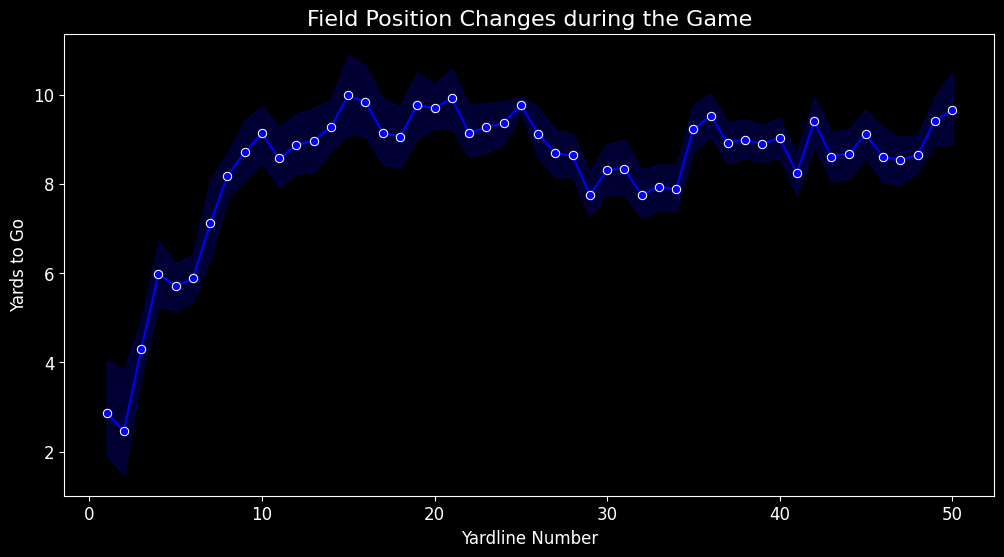

In [ ]:
#field position changes during the game
plt.figure(figsize=(12, 6))
sns.lineplot(x='yardlineNumber', y='yardsToGo', data=plays, marker='o', color='blue')
plt.title('Field Position Changes during the Game', fontsize=16)
plt.xlabel('Yardline Number', fontsize=12)
plt.ylabel('Yards to Go', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


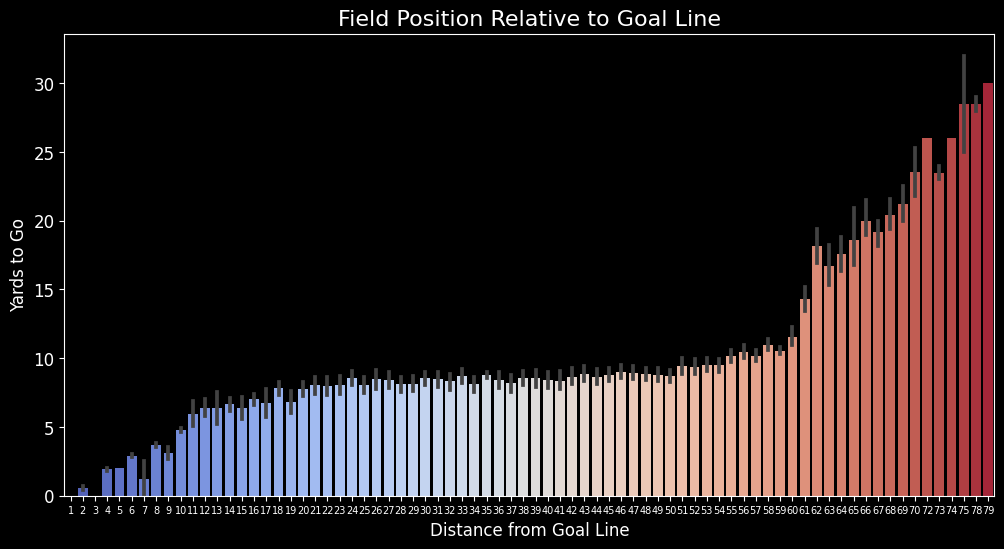

In [ ]:
#field position relative to goal line
'combining two columns and making a new one for the purpose'
plays['distance_from_goal_line'] = plays['yardlineNumber'] + plays['yardsToGo']
plt.figure(figsize=(12, 6))
'plotting the plot and defining x axis and y axis'
sns.barplot(x='distance_from_goal_line', y='yardsToGo', data=plays, palette='coolwarm')
'giving title to the plot and axes'
plt.title('Field Position Relative to Goal Line', fontsize=16)
plt.xlabel('Distance from Goal Line', fontsize=12)
plt.ylabel('Yards to Go', fontsize=12)
plt.xticks(fontsize=7)
plt.yticks(fontsize=12)
plt.show()

# **PFF SCOUTING DATA ANALYSIS**
Analysing various aspects of the game, like player roles, players that are blocked more, player performances and more.

In [ ]:
print(pffS.isnull().sum())
plays.drop_duplicates(inplace=True)
plays.fillna(0,inplace=True)

gameId                         0
playId                         0
nflId                          0
pff_role                       0
pff_positionLinedUp            0
pff_hit                    94127
pff_hurry                  94127
pff_sack                   94127
pff_beatenByDefender      140167
pff_hitAllowed            140167
pff_hurryAllowed          140167
pff_sackAllowed           140167
pff_nflIdBlockedPlayer    141728
pff_blockType             140350
pff_backFieldBlock        140351
dtype: int64


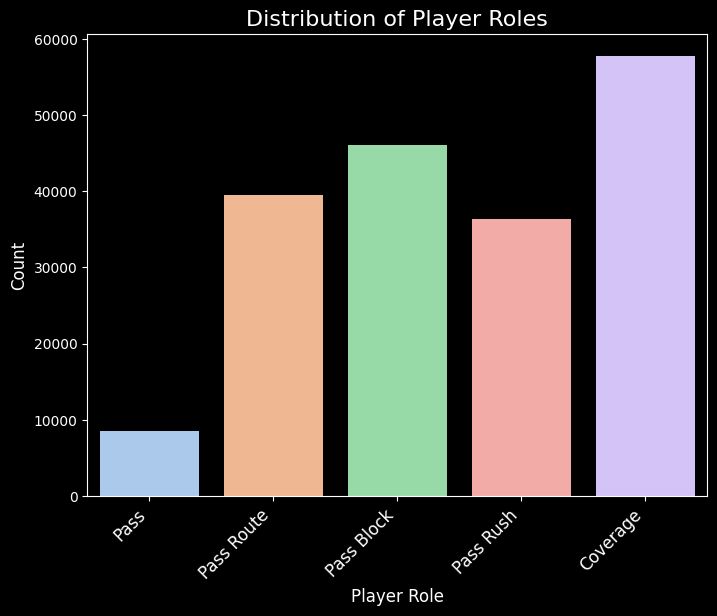

In [ ]:
#role distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='pff_role', data=pffS, palette='pastel')
plt.title('Distribution of Player Roles', fontsize=16)
plt.xlabel('Player Role', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

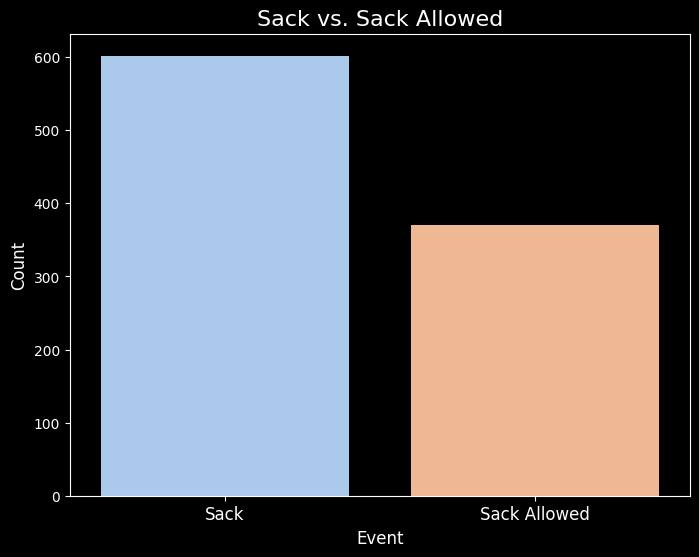

In [ ]:
#sack and sack allow comparisons
plt.figure(figsize=(8, 6))
sns.barplot(x=['Sack', 'Sack Allowed'],
            y=[pffS['pff_sack'].sum(), pffS['pff_sackAllowed'].sum()],
            palette='pastel')
plt.title('Sack vs. Sack Allowed', fontsize=16)
plt.xlabel('Event', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.show()


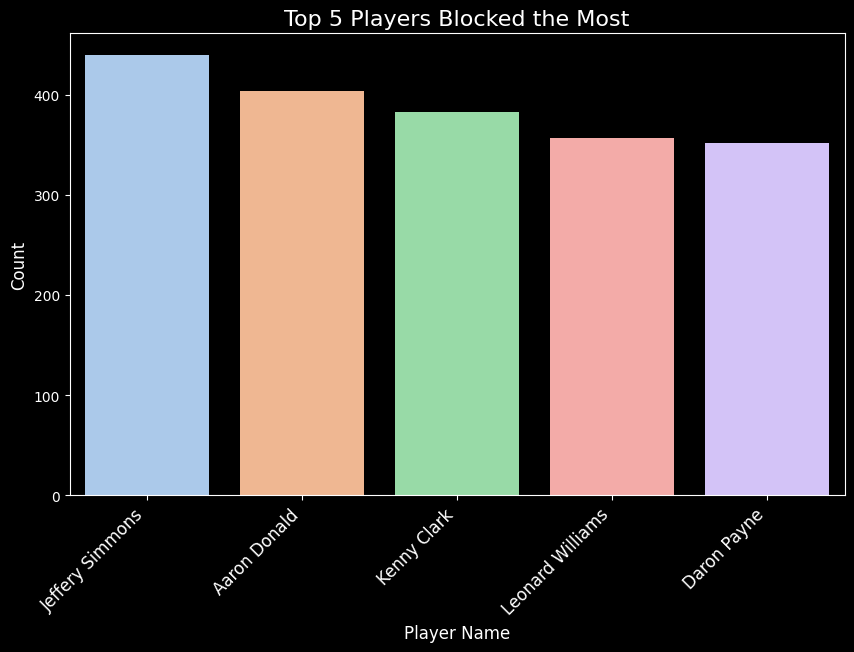

In [ ]:
#blocked player top 5
'calling out the variable'
top_blocked_players = pffS['pff_nflIdBlockedPlayer'].value_counts().head(5)
'mapping NFL IDs to player names using the dataframe'
player_names = players.set_index('nflId')['displayName']
top_blocked_players_names = top_blocked_players.index.map(player_names)
plt.figure(figsize=(10, 6))
'plotting the plot and defining the x axis and y axis'
sns.barplot(x=top_blocked_players_names, y=top_blocked_players.values, palette='pastel')
'giving title to the plot and axes'
plt.title('Top 5 Players Blocked the Most', fontsize=16)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

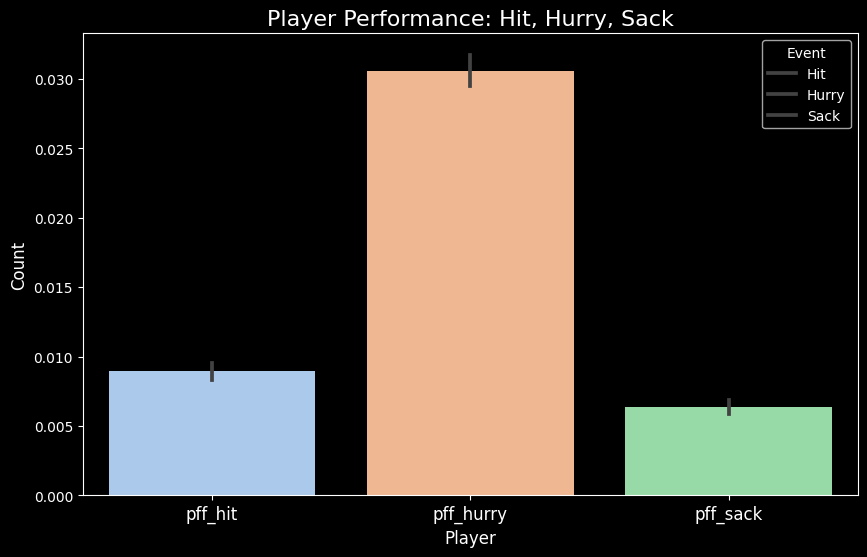

In [ ]:
#player comparison
'calling out the variable'
pff_performance = pffS[['pff_hit', 'pff_hurry', 'pff_sack']]
plt.figure(figsize=(10, 6))
'plotting the plot'
sns.barplot(data=pff_performance, palette='pastel')
'giving title to the plot and axes'
plt.title('Player Performance: Hit, Hurry, Sack', fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.legend(title='Event', labels=['Hit', 'Hurry', 'Sack'], fontsize=10)
plt.show()

# **WEEKLY GAME ANALYSIS**
Analysing players and their movements and other aspects throughout the 8 weeks of NFL

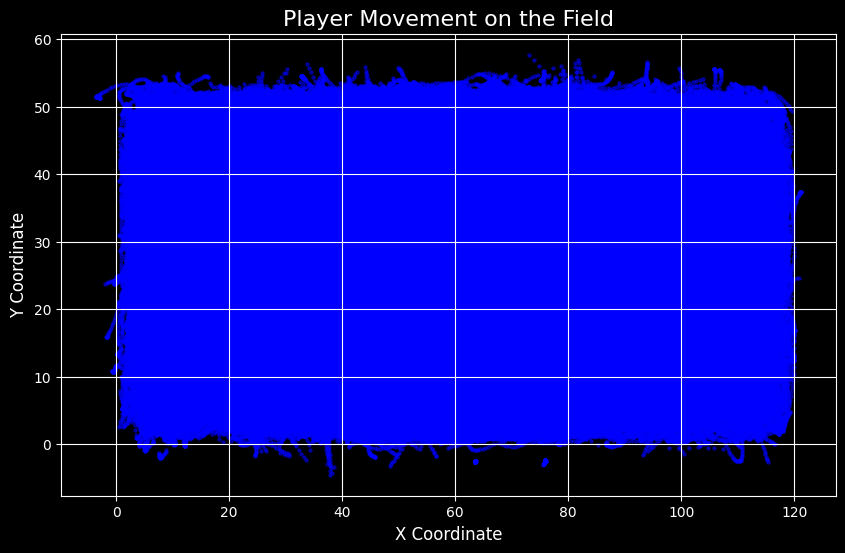

In [ ]:
#player movements
'concatinating all weeks data into one variable'
all_weeks_data = pd.concat([week1, week2, week3, week4, week5, week6, week7, week8], ignore_index=True)


plt.figure(figsize=(10, 6))
'creating a scatterplot for showing player movements throughout the field'
plt.scatter(all_weeks_data['x'], all_weeks_data['y'], s=5, c='b', alpha=0.5)
'giving title to the plot and axes'
plt.title('Player Movement on the Field', fontsize=16)
plt.xlabel('X Coordinate', fontsize=12)
plt.ylabel('Y Coordinate', fontsize=12)
plt.grid(True)
plt.show()

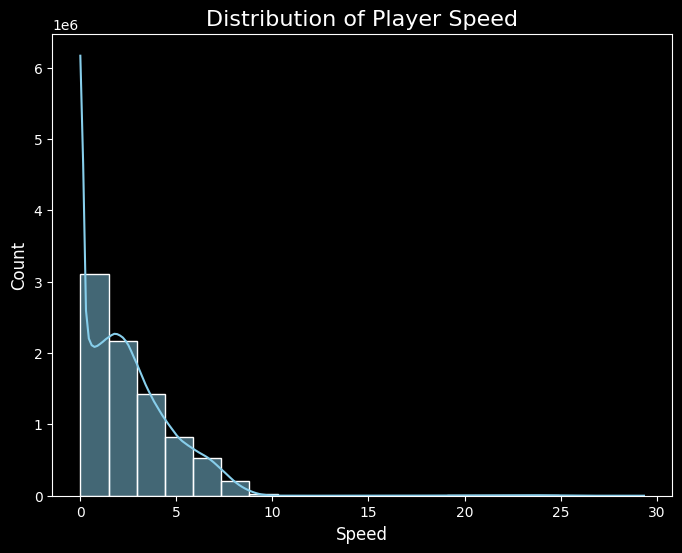

In [ ]:
#player's speed
plt.figure(figsize=(8, 6))
sns.histplot(all_weeks_data['s'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Player Speed', fontsize=16)
plt.xlabel('Speed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

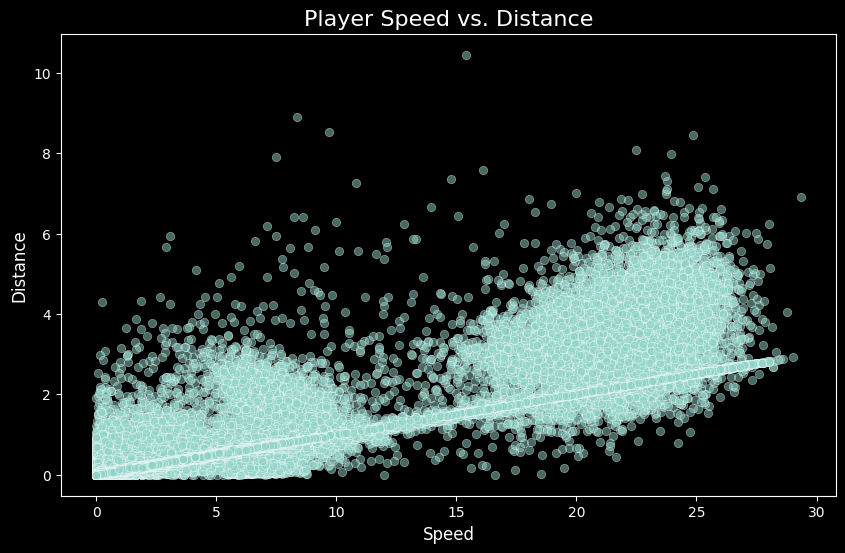

In [ ]:
#player speed vs distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='s', y='dis', data=all_weeks_data, alpha=0.5)
plt.title('Player Speed vs. Distance', fontsize=16)
plt.xlabel('Speed', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()